# **Feature engineering** is the process of using domain knowledge to select and create features (variables) for machine learning algorithms. It involves transforming raw data into meaningful features that help improve model performance.

In [ ]:

# creating a sample data table
import pandas as pd
table={
    "feature1":[1.0,None,3.0,4.0,5.0],
    "feature2":[2.0,3.0,None,5.0,None],
    "feature3":[None,3.0,4.0,None,6.0]
}
df=pd.DataFrame(table)
df.columns=df.columns.str.title()#converting column names to title case
print(df)
# # handling missing values with replacing with there mean,median,mode or removing the rows with missing values
# Imputation: Handling missing data by filling in missing values using statistical methods.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
df_imputed=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
print(df_imputed)

# df_fill=df.fillna(df.mean())
# print(df_fill)

   Feature1  Feature2  Feature3
0       1.0       2.0       NaN
1       NaN       3.0       3.0
2       3.0       NaN       4.0
3       4.0       5.0       NaN
4       5.0       NaN       6.0
   Feature1  Feature2  Feature3
0      1.00  2.000000  4.333333
1      3.25  3.000000  3.000000
2      3.00  3.333333  4.000000
3      4.00  5.000000  4.333333
4      5.00  3.333333  6.000000


In [ ]:
# Encoding Categorical Variables: Converting categorical variables into numerical representations that can be used by machine learning algorithms.
# common methods include one-hot encoding and label encoding
# creating a sample data
from sklearn.preprocessing import OneHotEncoder

data={
    "Color":["Red","Green","Blue","Red","Blue"]
}
data=pd.DataFrame(data)
print(data)

# Encoding categorical data
encoder=OneHotEncoder(sparse=False)
encoded_categories=encoder.fit_transform(data[["Color"]])
data_encoded=pd.DataFrame(encoded_categories,columns=encoder.get_feature_names_out(["Color"]))
data=pd.concat([data,data_encoded],axis=1).drop("Color",axis=1)
print(data)



   Color
0    Red
1  Green
2   Blue
3    Red
4   Blue
   Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         0.0          1.0        0.0
2         1.0          0.0        0.0
3         0.0          0.0        1.0
4         1.0          0.0        0.0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Feature scaling is a preprocessing technique used to standardize the range of independent variables so they have a similar scale
# common methods are min-max scaling and standardization(z-score normalization)
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

data = {
    "Feature1": [10, 20, 30, 40, 50],
    "Feature2": [100,200,300,400,500]
}
df = pd.DataFrame(data)
print(df)
print("\nMin-Max Normalization method:")
scaler=MinMaxScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
print(scaled_data)
print("\nStandard Normalization method:")
stscaler=StandardScaler()
Stscaler_data=pd.DataFrame(stscaler.fit_transform(df),columns=df.columns)
print(Stscaler_data)

   Feature1  Feature2
0        10       100
1        20       200
2        30       300
3        40       400
4        50       500

Min-Max Normalization method:
   Feature1  Feature2
0      0.00      0.00
1      0.25      0.25
2      0.50      0.50
3      0.75      0.75
4      1.00      1.00

Standard Normalization method:
   Feature1  Feature2
0 -1.414214 -1.414214
1 -0.707107 -0.707107
2  0.000000  0.000000
3  0.707107  0.707107
4  1.414214  1.414214


In [ ]:
# Feature Creation: Creating new features from existing ones that are more informative for the model.
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Example DataFrame
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4],
    'feature2': [5, 6, 7, 8]
})

# Creating polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data)
data_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['feature1', 'feature2']))

print(data_poly)


   feature1  feature2  feature1^2  feature1 feature2  feature2^2
0       1.0       5.0         1.0                5.0        25.0
1       2.0       6.0         4.0               12.0        36.0
2       3.0       7.0         9.0               21.0        49.0
3       4.0       8.0        16.0               32.0        64.0


### **Variance thresholding** is a feature selection technique used to remove features with low variance from a dataset. The rationale behind variance thresholding is that features with very low variance (close to zero) are likely not informative and may not contribute much to the model's performance.

### **Correlation matrix filtering** based on correlation matrix involves identifying and potentially removing features that are highly correlated with each other. Highly correlated features can lead to multicollinearity issues in regression models and may not add significant additional information to the model

### **Domain knowledge** is crucial in feature engineering and involves using expertise from the specific field or industry to manually select the most relevant features.

In [5]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
# Sample data
data={
    "feature1":[1,2,3,4,5],
    "feature2":[6,7,8,9,10],
    "feature3":[11,12,13,14,15],
    "constant":[1,1,1,1,1] #zero variance
}
df=pd.DataFrame(data)

# Variance Thresholding
selector=VarianceThreshold(threshold=0.1)
df_variance_filtered=pd.DataFrame(selector.fit_transform(df),columns=df.columns[selector.get_support()])
print(df_variance_filtered)

   feature1  feature2  feature3
0         1         6        11
1         2         7        12
2         3         8        13
3         4         9        14
4         5        10        15


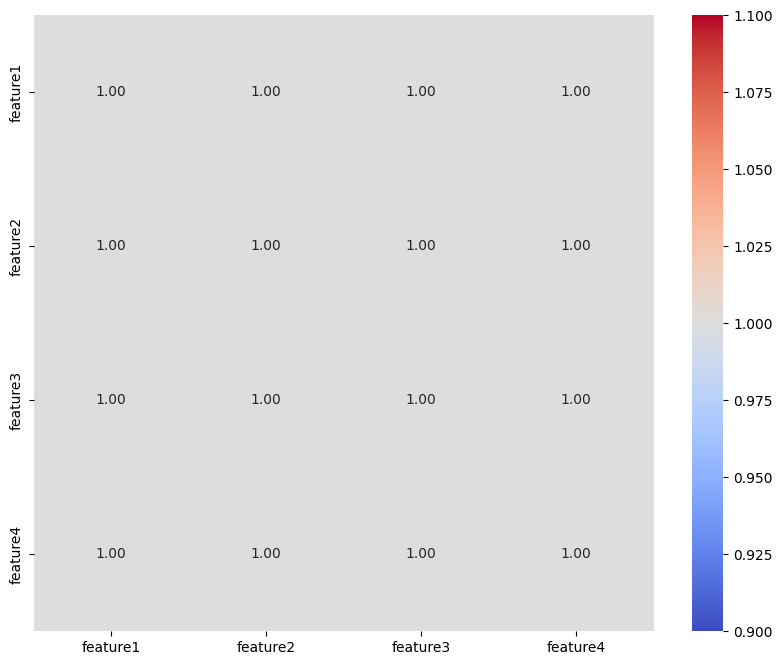

   feature1
0         1
1         2
2         3
3         4
4         5


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data={
    "feature1":[1,2,3,4,5],
    "feature2":[6,7,8,9,10],#feature 2 is highly correlated with feature 3
    "feature3":[6,7,8,9,10],
    "feature4":[11,12,13,14,15]
}
df=pd.DataFrame(data)
#correlation matrix
corr_matrix=df.corr().abs()
# plotting heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

# selecting the upper traingle of the matrix
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

# find features with correlation greater than 0.9
to_drop=[column for column in upper.columns if any(upper[column]>0.9)]

df_corr_filtered=df.drop(to_drop,axis=1)
print(df_corr_filtered)